In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_colwidth", 999)
pd.options.display.float_format = "{:.3f}".format

In [2]:
#Separating columns by "\"
df = pd.read_csv("/Users/chintanvaghela/Desktop/Data Science/Customer Personality Analysis/mkt_campaign.csv", sep='\t')

In [3]:
#Looking at the first 5 rows of the dataset
df.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
#Looking at the shape of the dataset
df.shape

(2240, 29)

In [5]:
#Printing the columns in the dataset
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [6]:
#Looking at total null values in the columns
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#Counting the total number of observations in the categorical variables - Education
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
#Replacing education column entries with a more generalized entry
df['Education'] = df['Education'].replace(['Master', '2n Cycle', 'PhD', 'Graduation'],'Grad')
df['Education'] = df['Education'].replace('Basic','Undergrad')

#Counting total values for each entry
df['Education'].value_counts()

Grad         2186
Undergrad      54
Name: Education, dtype: int64

In [9]:
#Counting the total number of observations in the categorical variables - Marital Status
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [10]:
#Counting the total number of observations in the categorical variables - Kidhome (number of kids in the household)
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [11]:
#Counting the total number of observations in the categorical variables - Teenhome (number of teens in the household)
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [12]:
#Replacing education column entries with a more generalized entry
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Widow','Divorced')

#Counting total values for each entry
df['Marital_Status'].value_counts()

Married     1444
Single       487
Divorced     309
Name: Marital_Status, dtype: int64

In [13]:
#Statistical values for each variable
df.describe()

ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.000    2240.000   2216.000 2240.000  2240.000 2240.000  2240.000   
mean   5592.160    1968.806  52247.251    0.444     0.506   49.109   303.936   
std    3246.662      11.984  25173.077    0.538     0.545   28.962   336.597   
min       0.000    1893.000   1730.000    0.000     0.000    0.000     0.000   
25%    2828.250    1959.000  35303.000    0.000     0.000   24.000    23.750   
50%    5458.500    1970.000  51381.500    0.000     0.000   49.000   173.500   
75%    8427.750    1977.000  68522.000    1.000     1.000   74.000   504.250   
max   11191.000    1996.000 666666.000    2.000     2.000   99.000  1493.000   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count   2240.000         2240.000         2240.000          2240.000   
mean      26.302          166.950           37.525            27.063   
std       39.773          225.715           54.629            41.280   
min        0.000            0.000            0.000             0.000   
25%        1.000           16.000            3.000             1.000   
50%        8.000           67.000           12.000             8.000   
75%       33.000          232.000           50.000            33.000   
max      199.000         1725.000          259.000           263.000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count      2240.000           2240.000         2240.000             2240.000   
mean         44.022              2.325            4.085                2.662   
std          52.167              1.932            2.779                2.923   
min           0.000              0.000            0.000                0.000   
25%           9.000              1.000            2.000                0.000   
50%          24.000              2.000            4.000                2.000   
75%          56.000              3.000            6.000                4.000   
max         362.000             15.000           27.000               28.000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count           2240.000           2240.000      2240.000      2240.000   
mean               5.790              5.317         0.073         0.075   
std                3.251              2.427         0.260         0.263   
min                0.000              0.000         0.000         0.000   
25%                3.000              3.000         0.000         0.000   
50%                5.000              6.000         0.000         0.000   
75%                8.000              7.000         0.000         0.000   
max               13.000             20.000         1.000         1.000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count      2240.000      2240.000      2240.000  2240.000       2240.000   
mean          0.073         0.064         0.013     0.009          3.000   
std           0.260         0.245         0.115     0.096          0.000   
min           0.000         0.000         0.000     0.000          3.000   
25%           0.000         0.000         0.000     0.000          3.000   
50%           0.000         0.000         0.000     0.000          3.000   
75%           0.000         0.000         0.000     0.000          3.000   
max           1.000         1.000         1.000     1.000          3.000   

       Z_Revenue  Response  
count   2240.000  2240.000  
mean      11.000     0.149  
std        0.000     0.356  
min       11.000     0.000  
25%       11.000     0.000  
50%       11.000     0.000  
75%       11.000     0.000  
max       11.000     1.000

In [14]:
#Statistical information vertical
df.describe().T

count      mean       std      min       25%       50%  \
ID                  2240.000  5592.160  3246.662    0.000  2828.250  5458.500   
Year_Birth          2240.000  1968.806    11.984 1893.000  1959.000  1970.000   
Income              2216.000 52247.251 25173.077 1730.000 35303.000 51381.500   
Kidhome             2240.000     0.444     0.538    0.000     0.000     0.000   
Teenhome            2240.000     0.506     0.545    0.000     0.000     0.000   
Recency             2240.000    49.109    28.962    0.000    24.000    49.000   
MntWines            2240.000   303.936   336.597    0.000    23.750   173.500   
MntFruits           2240.000    26.302    39.773    0.000     1.000     8.000   
MntMeatProducts     2240.000   166.950   225.715    0.000    16.000    67.000   
MntFishProducts     2240.000    37.525    54.629    0.000     3.000    12.000   
MntSweetProducts    2240.000    27.063    41.280    0.000     1.000     8.000   
MntGoldProds        2240.000    44.022    52.167    0.000     9.000    24.000   
NumDealsPurchases   2240.000     2.325     1.932    0.000     1.000     2.000   
NumWebPurchases     2240.000     4.085     2.779    0.000     2.000     4.000   
NumCatalogPurchases 2240.000     2.662     2.923    0.000     0.000     2.000   
NumStorePurchases   2240.000     5.790     3.251    0.000     3.000     5.000   
NumWebVisitsMonth   2240.000     5.317     2.427    0.000     3.000     6.000   
AcceptedCmp3        2240.000     0.073     0.260    0.000     0.000     0.000   
AcceptedCmp4        2240.000     0.075     0.263    0.000     0.000     0.000   
AcceptedCmp5        2240.000     0.073     0.260    0.000     0.000     0.000   
AcceptedCmp1        2240.000     0.064     0.245    0.000     0.000     0.000   
AcceptedCmp2        2240.000     0.013     0.115    0.000     0.000     0.000   
Complain            2240.000     0.009     0.096    0.000     0.000     0.000   
Z_CostContact       2240.000     3.000     0.000    3.000     3.000     3.000   
Z_Revenue           2240.000    11.000     0.000   11.000    11.000    11.000   
Response            2240.000     0.149     0.356    0.000     0.000     0.000   

                          75%        max  
ID                   8427.750  11191.000  
Year_Birth           1977.000   1996.000  
Income              68522.000 666666.000  
Kidhome                 1.000      2.000  
Teenhome                1.000      2.000  
Recency                74.000     99.000  
MntWines              504.250   1493.000  
MntFruits              33.000    199.000  
MntMeatProducts       232.000   1725.000  
MntFishProducts        50.000    259.000  
MntSweetProducts       33.000    263.000  
MntGoldProds           56.000    362.000  
NumDealsPurchases       3.000     15.000  
NumWebPurchases         6.000     27.000  
NumCatalogPurchases     4.000     28.000  
NumStorePurchases       8.000     13.000  
NumWebVisitsMonth       7.000     20.000  
AcceptedCmp3            0.000      1.000  
AcceptedCmp4            0.000      1.000  
AcceptedCmp5            0.000      1.000  
AcceptedCmp1            0.000      1.000  
AcceptedCmp2            0.000      1.000  
Complain                0.000      1.000  
Z_CostContact           3.000      3.000  
Z_Revenue              11.000     11.000  
Response                0.000      1.000

In [15]:
#Adding "daya_engaged" columns to find out more about the number of days a customer has been engaged 
#to a specific product
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer)
df["first_day"]='2012-01-08'
df["first_day"] = pd.to_datetime(df["first_day"])
df["days_engaged"] = (df["first_day"] - df["Dt_Customer"]).dt.days

In [16]:
#Separating products to different dataframe for Association ruke Mining
product_data = []
for i in range(0, len(df)):
    productdata = [df['MntWines'][i], df['MntFruits'][i], 
                  df['MntMeatProducts'][i], df['MntFishProducts'][i], 
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
    product_data.append(productdata)

products_df = pd.DataFrame(product_data, columns = ["Wines", "Fruits", "Meat", "Fish", "Sweets",
                                                   "Gold"])
products_df.head()

Wines  Fruits  Meat  Fish  Sweets  Gold
0    635      88   546   172      88    88
1     11       1     6     2       1     6
2    426      49   127   111      21    42
3     11       4    20    10       3     5
4    173      43   118    46      27    15

In [17]:
#Finding unique values/variables present in each column
df.nunique()

#It can be seen that ID is unique for each entries, hence we have a unique ID for each variable

ID                     2240
Year_Birth               59
Education                 2
Marital_Status            3
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
first_day                 1
days_engaged            663
dtype: int64

<AxesSubplot:>

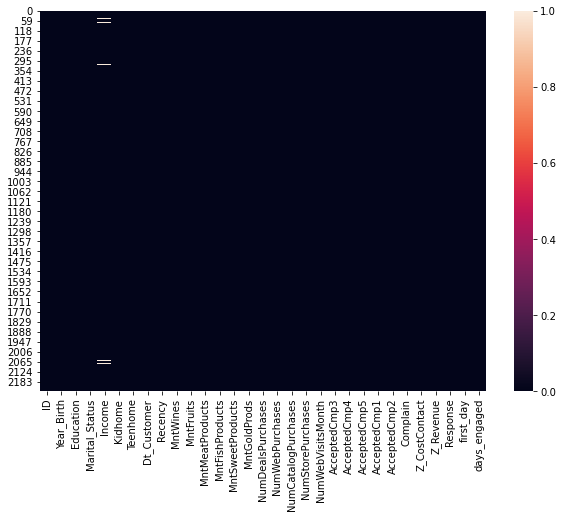

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

In [19]:
#Checking for total duplicate values in the dataset
df.duplicated().sum()

0

In [20]:
df.head()

ID  Year_Birth Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957      Grad         Single 58138.000        0         0   
1  2174        1954      Grad         Single 46344.000        1         1   
2  4141        1965      Grad        Married 71613.000        0         0   
3  6182        1984      Grad        Married 26646.000        1         0   
4  5324        1981      Grad        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  first_day  days_engaged  
0              3         11         1 2012-01-08           -92  
1              3         11         0 2012-01-08          -938  
2              3         11         0 2012-01-08          -591  
3              3         11         0 2012-01-08          -998  
4              3         11         0 2012-01-08          -742

### Feature Engineering

In [21]:
#Creating the total money spent on items column
df['MoneySpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Creating the age column
df['Age'] = 2022 - df['Year_Birth']

#Creating the total number of kids column
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

#Creating the total purchases columns
df['PurchaseNum'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [22]:
#Droppping columns that are not necessary for our analysis
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'first_day'], axis = 1, inplace = True)

### Data Visualization

<AxesSubplot:xlabel='Income', ylabel='Density'>

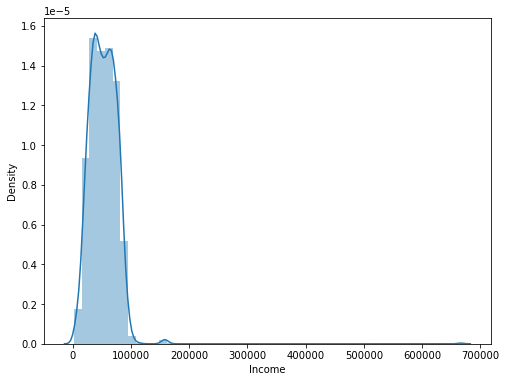

In [23]:
plt.figure(figsize = (8,6))
sns.distplot(df['Income'])

<AxesSubplot:xlabel='MoneySpent', ylabel='Density'>

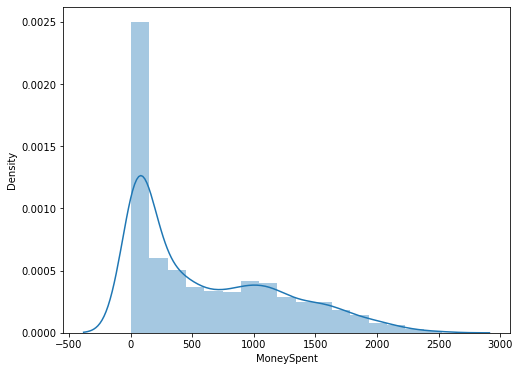

In [24]:
plt.figure(figsize = (8,6))
sns.distplot(df['MoneySpent'])

<AxesSubplot:xlabel='PurchaseNum', ylabel='Density'>

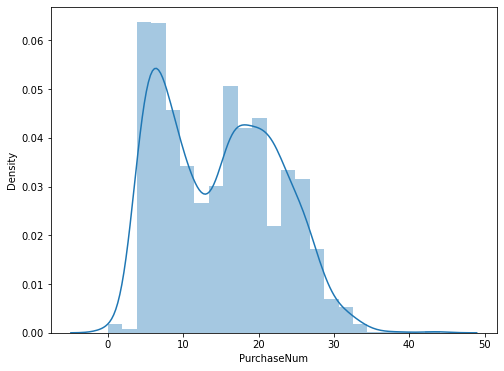

In [25]:
plt.figure(figsize = (8,6))
sns.distplot(df['PurchaseNum'])

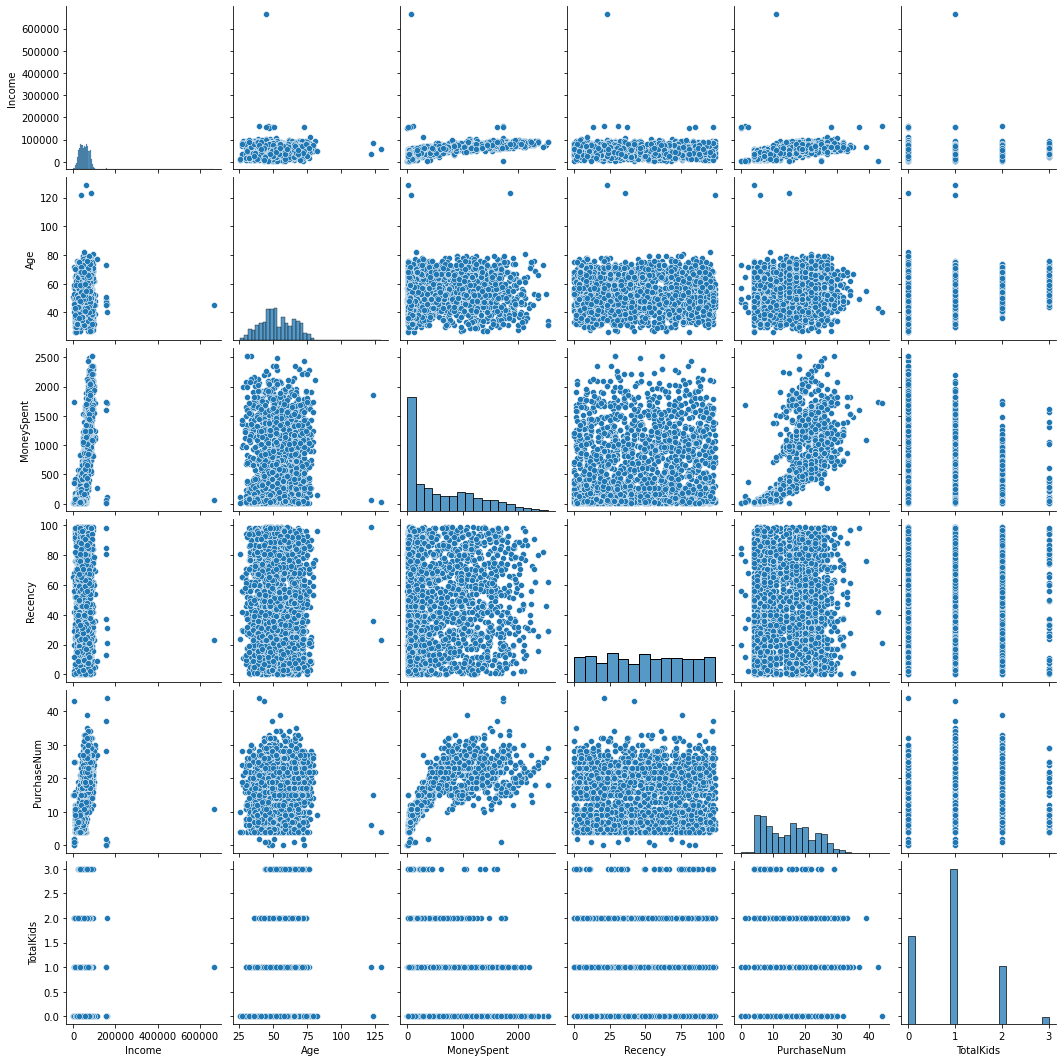

In [26]:
cols_to_plot = ['Income', 'Age', 'MoneySpent', 'Recency', 'PurchaseNum', 'TotalKids']

sns.pairplot(df[cols_to_plot])

In [27]:
#Removing TotalKids from the cols_to_plot to plot the graphs
cols_to_plot.remove('TotalKids')

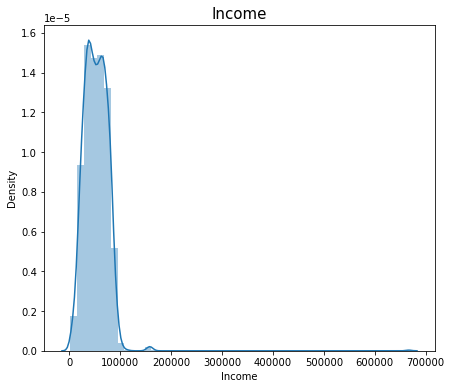

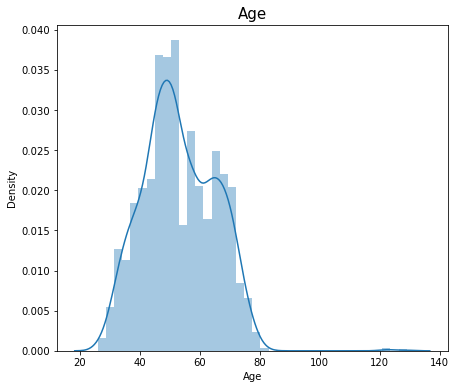

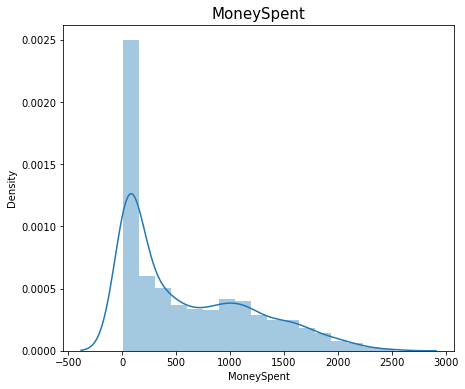

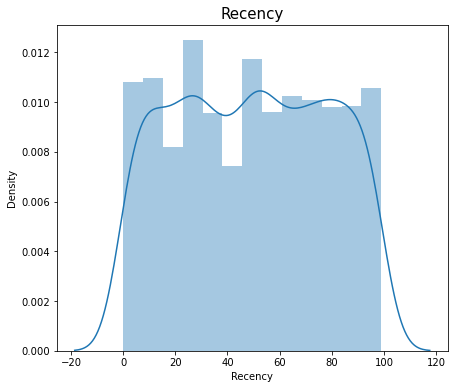

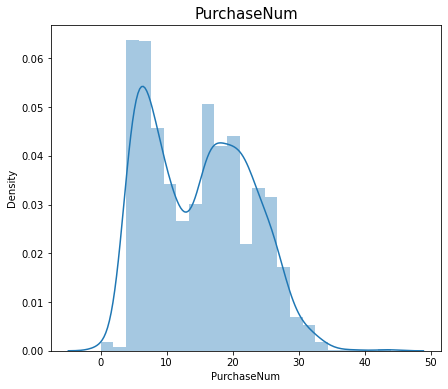

In [28]:
#Plotting distribution of each variable
for col in cols_to_plot:
    plt.figure(figsize = (7,6))
    sns.distplot(df[col])
    plt.title(f"{col}", size = 15)
    plt.show()

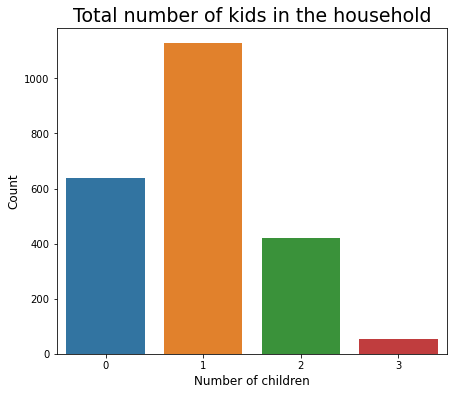

In [29]:
#Plotting the visualization (countplot) for total kids in the household
plt.figure(figsize = (7,6))
sns.countplot(df['TotalKids'])
plt.title("Total number of kids in the household", size = 19)
plt.xlabel("Number of children", size = 12)
plt.ylabel("Count", size = 12)
plt.show()

Text(0, 0.5, 'Count')

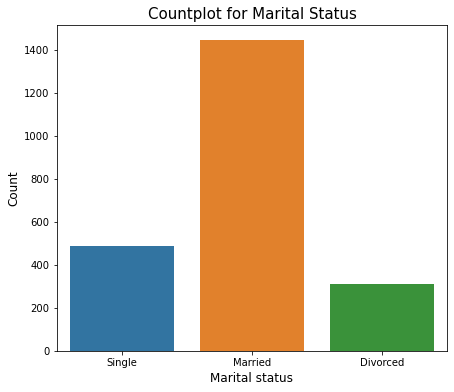

In [30]:
#Plotting a countplot for 'Marital_Status' for the dataset
plt.figure(figsize = (7,6))
sns.countplot(df['Marital_Status'])
plt.title("Countplot for Marital Status", size = 15)
plt.xlabel("Marital status", size = 12)
plt.ylabel("Count", size = 12)

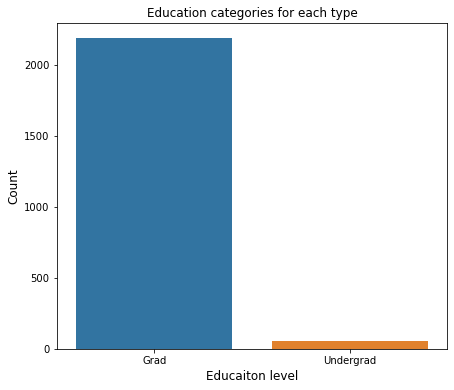

In [31]:
#Distribution of education level 
plt.figure(figsize = (7,6))
sns.countplot(df['Education'])
plt.title('Education categories for each type', size = 12)
plt.xlabel("Educaiton level", size = 12)
plt.ylabel("Count", size = 12)
plt.show()

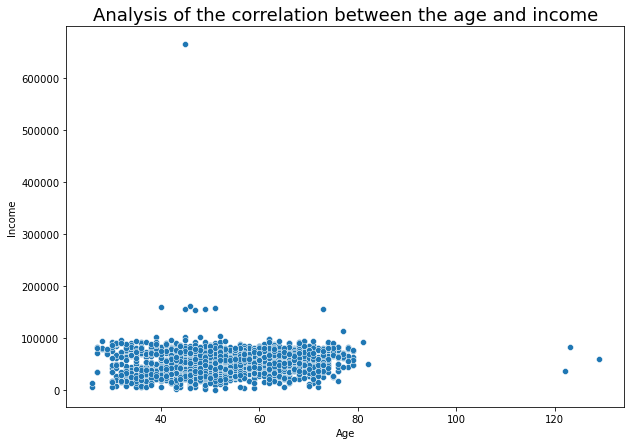

In [32]:
#Distribution of Age vs Income
plt.figure(figsize = (10,7))
sns.scatterplot(y=df['Income'], x=df['Age'])
plt.title("Analysis of the correlation between the age and income", size = 18);

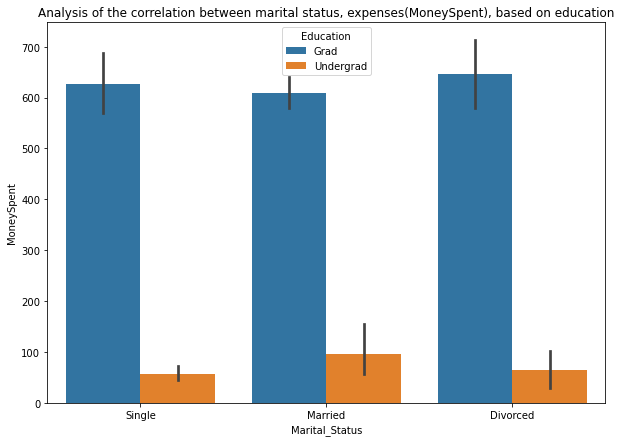

In [33]:
#Distribution of Expenses (MoneySpent) vs Marital status and education level
plt.figure(figsize=(10,7))
sns.barplot(x=df['Marital_Status'], y=df['MoneySpent'], hue=df['Education'])
plt.title("Analysis of the correlation between marital status, expenses(MoneySpent), based on education");

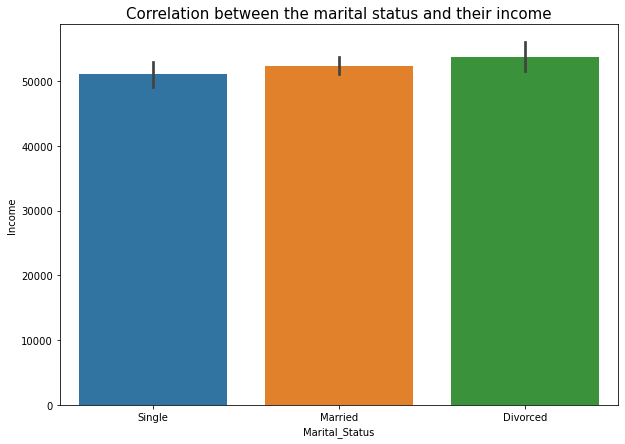

In [34]:
#Distribution of Marital status vs Income
plt.figure(figsize=(10,7))
sns.barplot(x=df['Marital_Status'], y=df['Income'])
plt.title("Correlation between the marital status and their income", size=15);

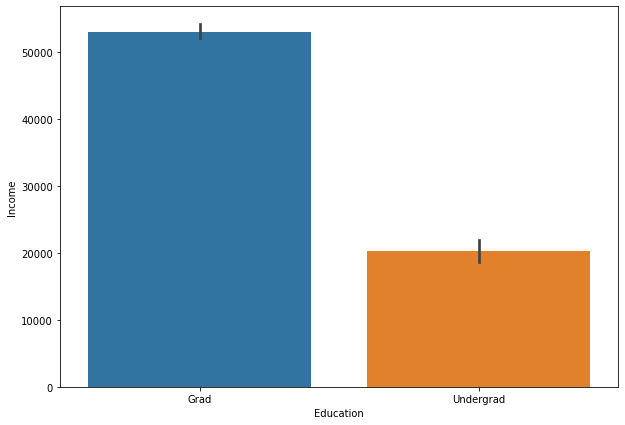

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Education'], y=df['Income'])
plt.show()

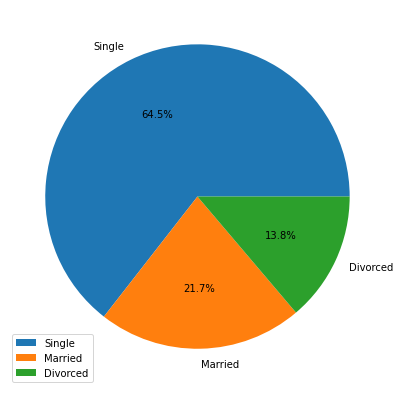

In [36]:
#Pie distribution of marital status
plt.figure(figsize = (10,7))
plt.pie(df['Marital_Status'].value_counts(), autopct='%1.1f%%', labels=['Single', 'Married', 'Divorced'])
plt.legend()
plt.show();

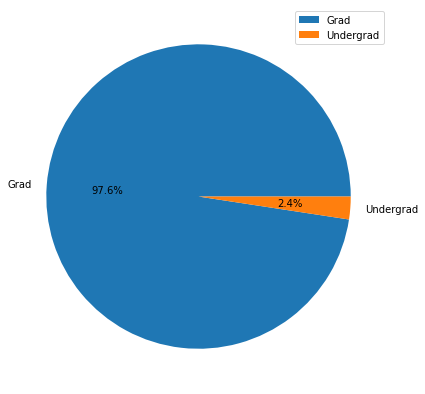

In [37]:
#Pie distribution of education level
plt.figure(figsize=(10,7))
plt.pie(df['Education'].value_counts(), autopct="%1.1f%%", labels=['Grad', 'Undergrad'])
plt.legend();

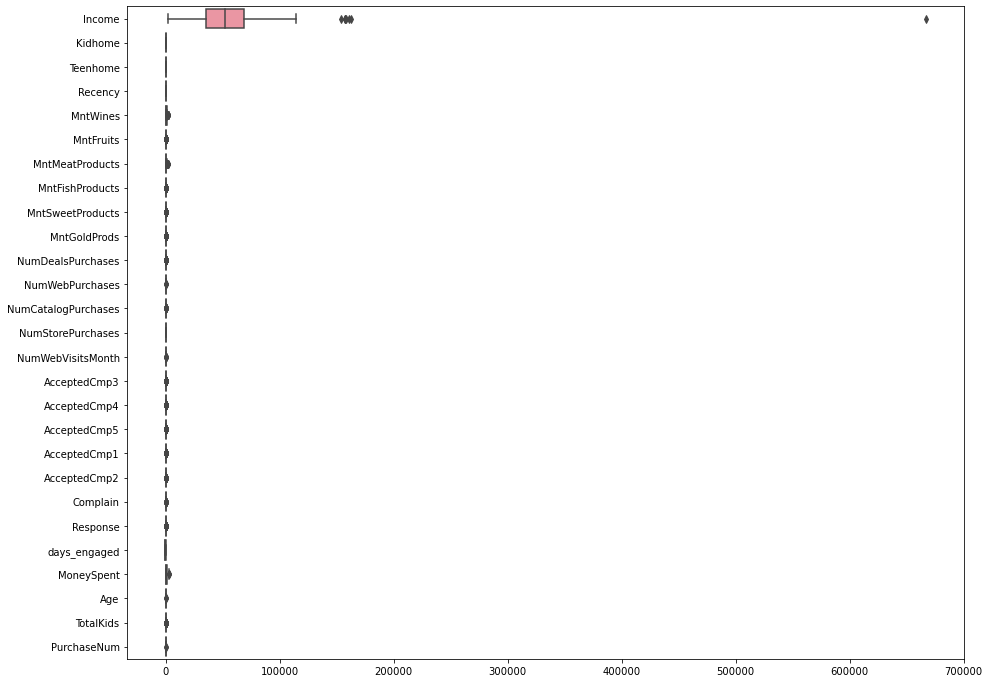

In [38]:
#Looking for outliers in the dataset
plt.figure(figsize=(15, 12))
ax = sns.boxplot(data = df, orient = 'h')

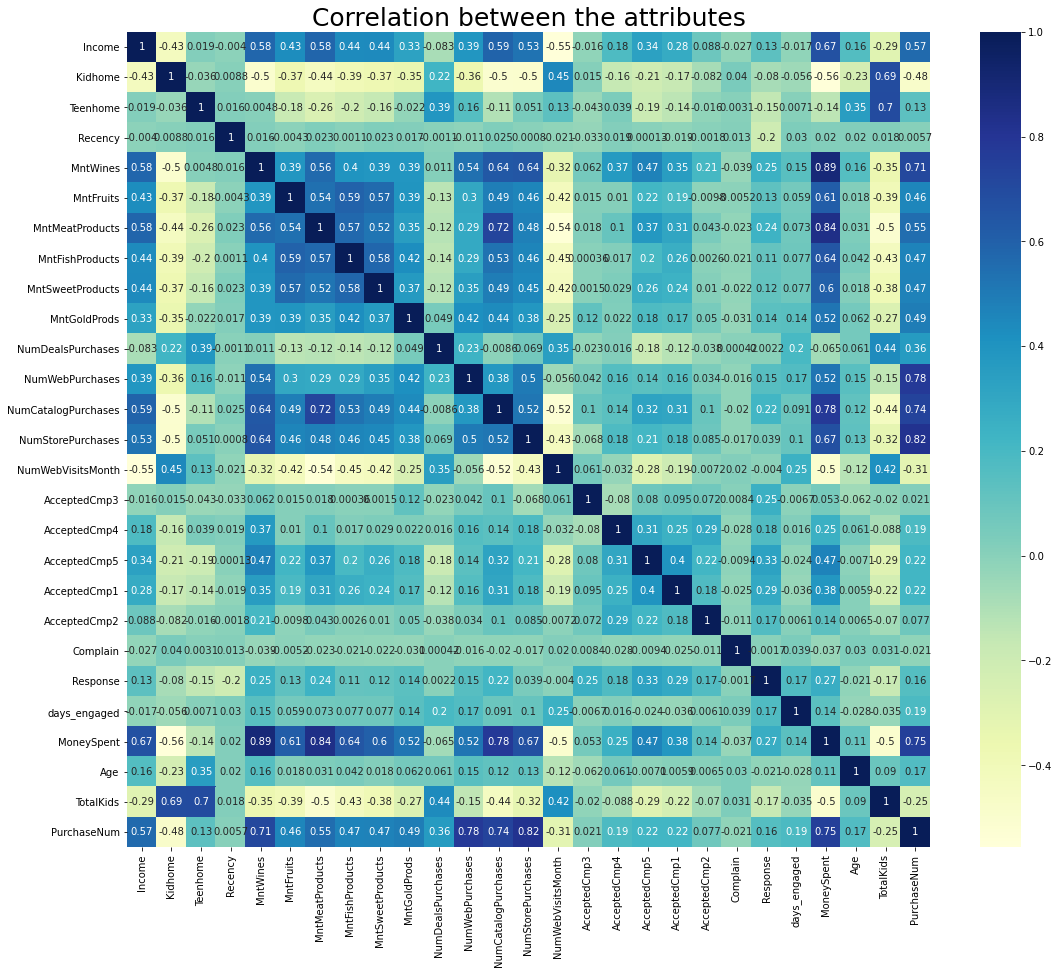

In [39]:
#Plotting the heatmap for the entire dataset
plt.figure(figsize = (18,15))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.title("Correlation between the attributes", size = 25);

## Data Preprocessing
#### One-hot encoding

In [40]:
df.dropna(inplace = True)

In [41]:
#Importing sklearn libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

cate = []

for i in df.columns:
    if df[i].dtypes =='object':
        cate.append(i)
        
print(cate)

['Education', 'Marital_Status']


In [42]:
lbl_encd = LabelEncoder()
for i in cate:
    df[i] = df[[i]].apply(lbl_encd.fit_transform)

### (A bit more) Data cleaning here:

In [43]:
#df = df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
#Dropping and removing the unwanted columns from the dataset
cols_del = ["Kidhome", "Teenhome","Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","NumDealsPurchases", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2"]
df.drop(columns=cols_del, axis=1, inplace=True) 
df.head()

Education  Marital_Status    Income  Complain  Response  days_engaged  \
0          0               2 58138.000         0         1           -92   
1          0               2 46344.000         0         0          -938   
2          0               1 71613.000         0         0          -591   
3          0               1 26646.000         0         0          -998   
4          0               1 58293.000         0         0          -742   

   MoneySpent  Age  TotalKids  PurchaseNum  
0        1617   65          0           25  
1          27   68          2            6  
2         776   57          0           21  
3          53   38          1            8  
4         422   41          1           19

In [44]:
#Making a copy of the original dataset
df1 = df.copy()

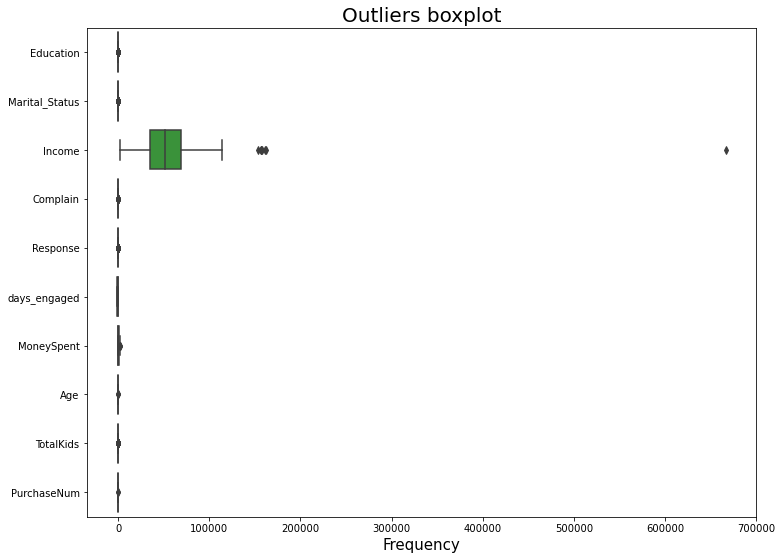

In [45]:
#Plotting the outliers
plt.figure(figsize=(12,9))
ax = sns.boxplot(data = df1, orient = 'h')
plt.xlabel("Frequency" ,size = 15)
plt.title("Outliers boxplot", size = 20)
plt.show()

In [46]:
#Removing the outliers from the dataset
from math import sqrt
q3 = df1.quantile(0.75)
q1 = df1.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df1 = df1[~((df1 < lower_range) | (df1 > upper_range)).any(axis=1)]

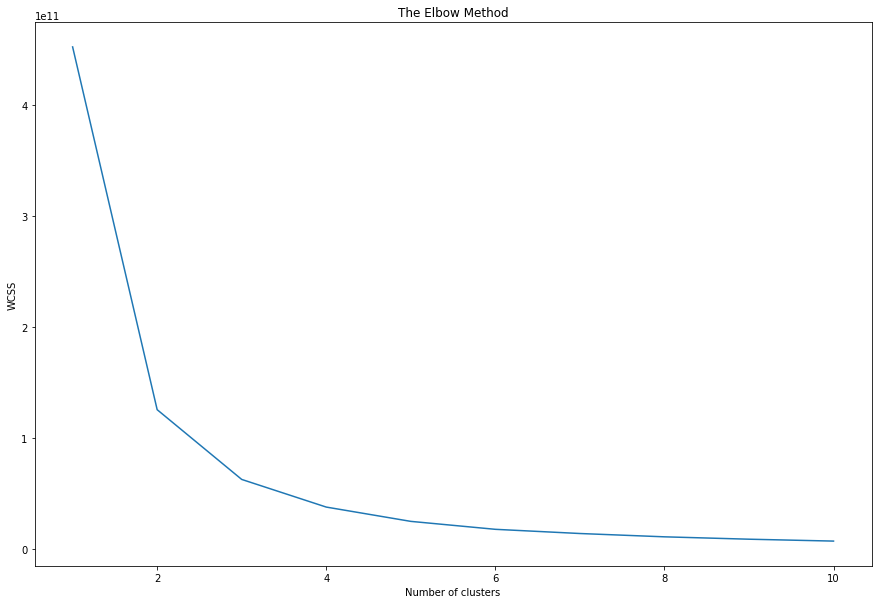

In [47]:
#Importing libraries
from sklearn.cluster import KMeans

#Within cluster sum of squares: squared distance between each point and the centroid of the cluster
wcss = []

#Varying the values of clusters from 1 to 10
for i in range (1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### Since it is not clear which value of K to choose from the elbow point graph
##### Calculating Silhoutte Scores

In [48]:
#Importing the silhoutte score from the sklearn libraries
from sklearn.metrics import silhouette_score

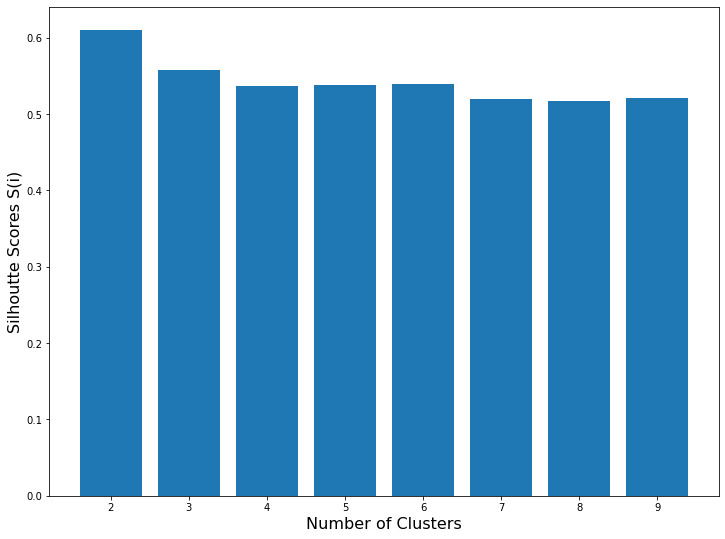

Silhoutte Scores
2             0.610
3             0.557
4             0.537
5             0.537
6             0.539
7             0.519
8             0.516
9             0.521

In [49]:
#Silhoutte score: 1: Means clusters are well apart from each other and clearly distinguished
#Silhoutee score: 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c=m1.fit_predict(df1)
    silhouette_scores.append(silhouette_score(df1,m1.fit_predict(df1)))
    
#Plotting a bar chart to visually represent the silhoutte scores
plt.figure(figsize = (12,9))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel("Number of Clusters", size = 16)
plt.ylabel("Silhoutte Scores S(i)", size = 16)
plt.show()

#Printing the list of silhoutte scores respective to each cluster
clus_nums = range(2,10)
display(pd.DataFrame(silhouette_scores, index=clus_nums, columns=['Silhoutte Scores']))

In [50]:
#Getting the maximum values of the silhoutte score
max_clust=max(silhouette_scores)

#Adding 2 to the index since index starts from 2
num_of_clust=silhouette_scores.index(max_clust)+2
print(num_of_clust)

2


### Model Building

In [51]:
#Training a predicting using K-Means Algorithm
kmeans = KMeans(n_clusters=num_of_clust, random_state=42).fit(df1)
pred = kmeans.predict(df1)

#Appending those cluster values into main dataframe df1 (not using standard-scalar)
df1['Cluster'] = pred+1

In [52]:
#Viweing the first 5 rows of the dataframe
df1.head()

Education  Marital_Status    Income  Complain  Response  days_engaged  \
2          0               1 71613.000         0         0          -591   
3          0               1 26646.000         0         0          -998   
4          0               1 58293.000         0         0          -742   
5          0               1 62513.000         0         0          -610   
7          0               1 33454.000         0         0          -575   

   MoneySpent  Age  TotalKids  PurchaseNum  Cluster  
2         776   57          0           21        1  
3          53   38          1            8        2  
4         422   41          1           19        1  
5         716   55          1           22        1  
7         169   37          1           10        2

In [53]:
#Getting total number of observations in both the clusters
df1['Cluster'].value_counts()

1    615
2    574
Name: Cluster, dtype: int64

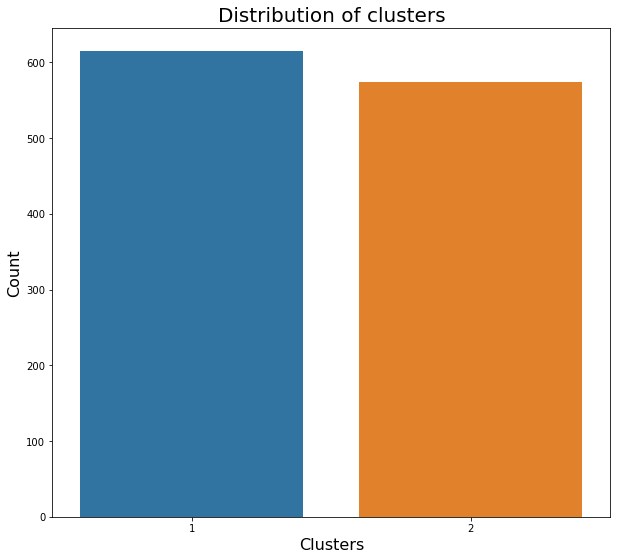

1    615
2    574
Name: Cluster, dtype: int64

In [54]:
#Plotting both clusters total values side by side for visual comparison
plt.figure(figsize=(10,9))
sns.countplot(x=df1['Cluster'])
plt.title("Distribution of clusters", size=20)
plt.xlabel("Clusters", size = 16)
plt.ylabel("Count", size = 16)
plt.show()
df1["Cluster"].value_counts()

##### It can be observed that more customers are allocated in cluster 1

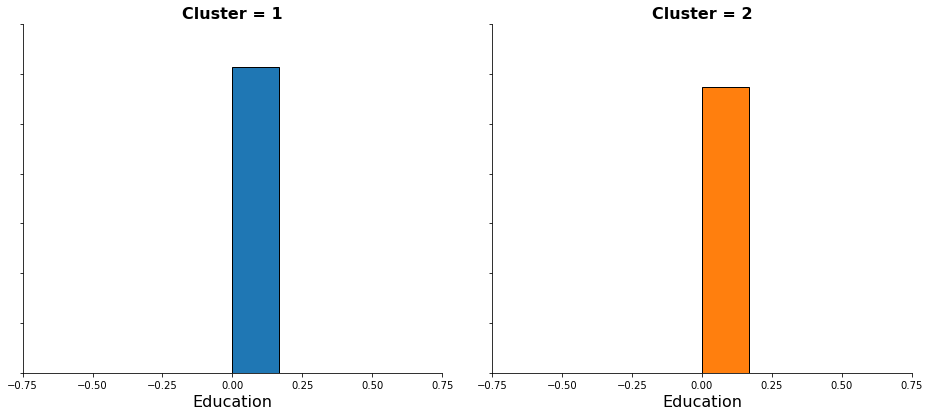

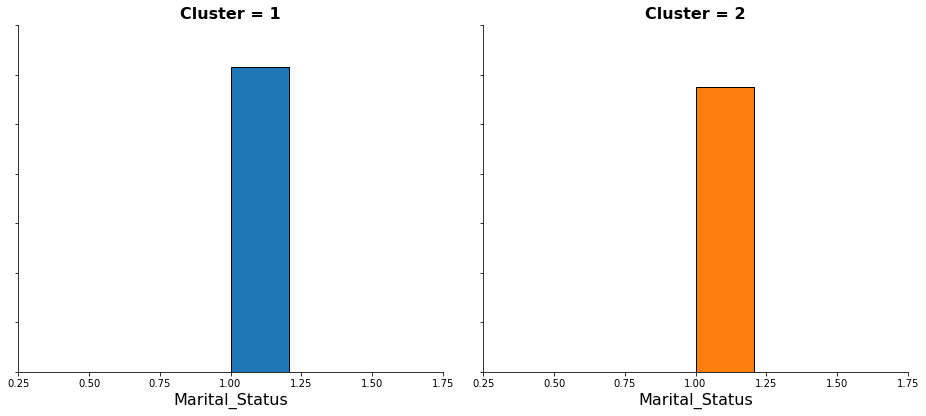

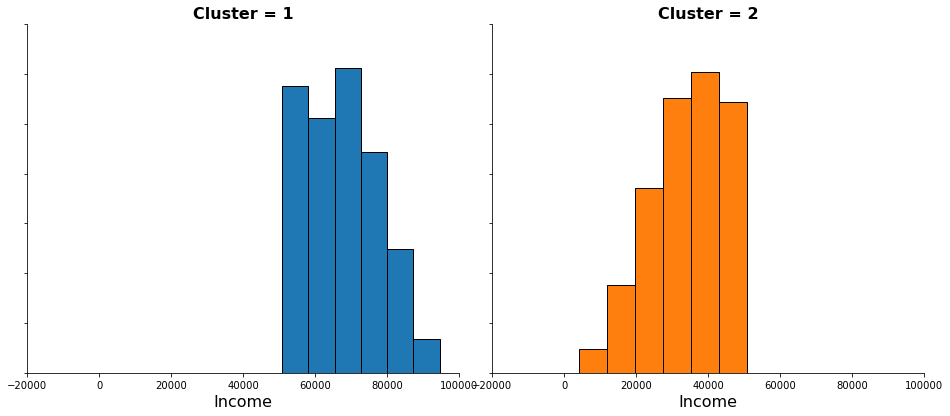

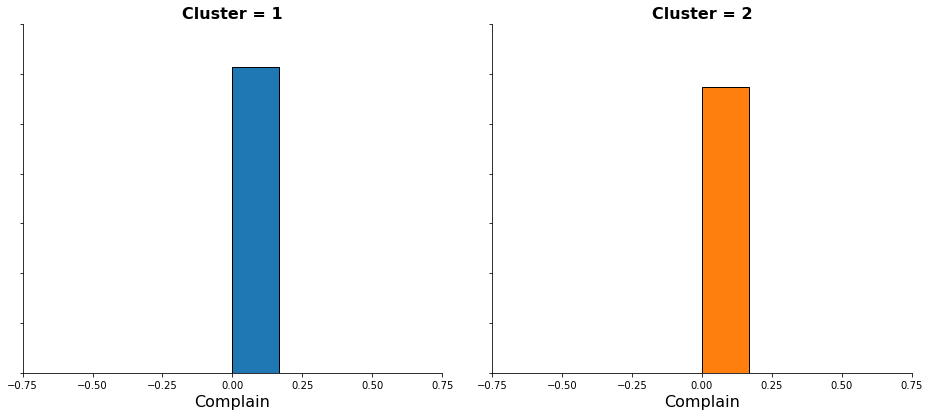

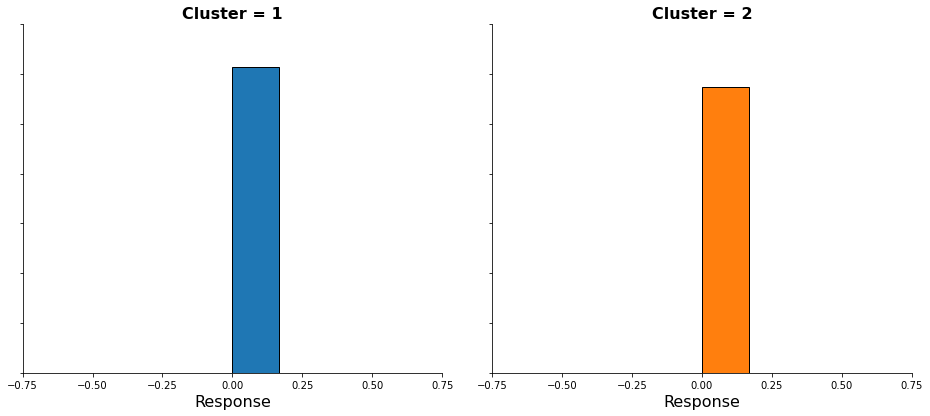

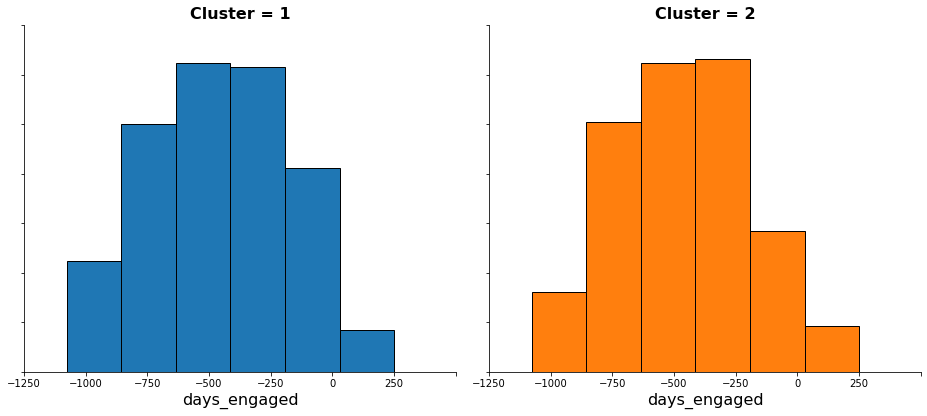

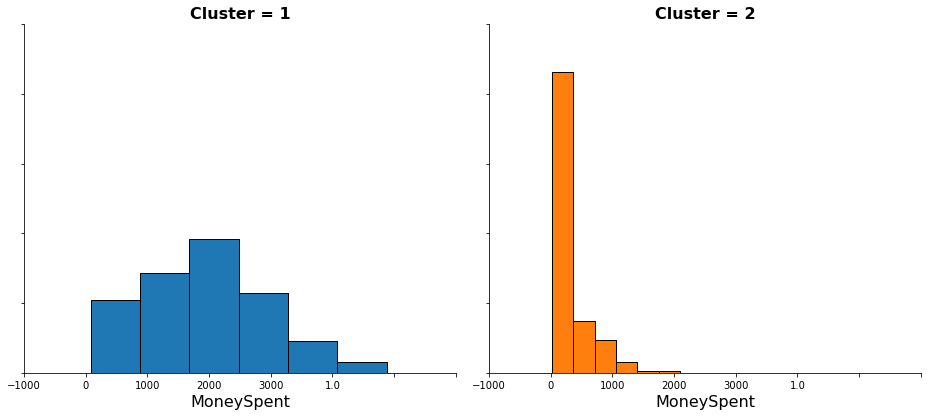

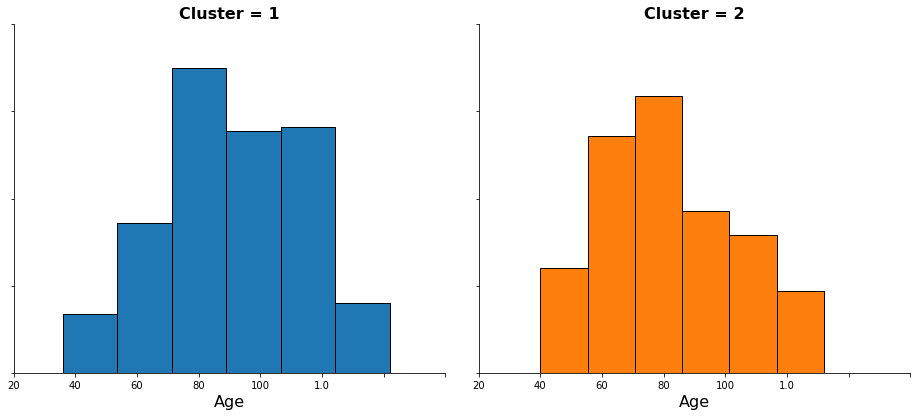

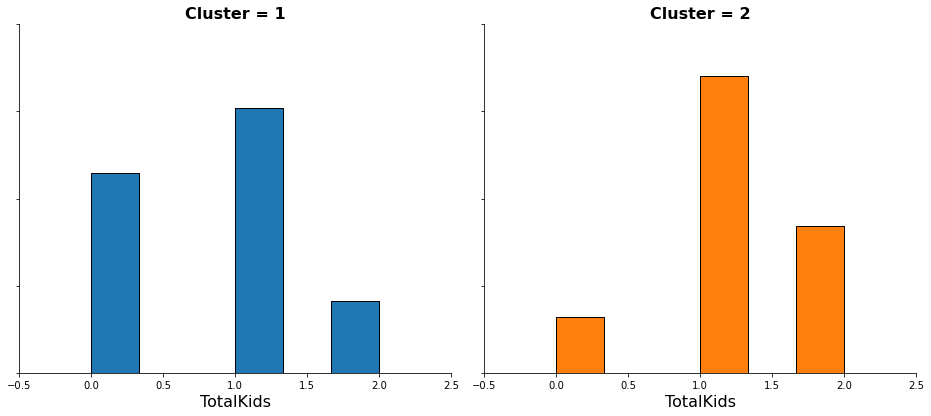

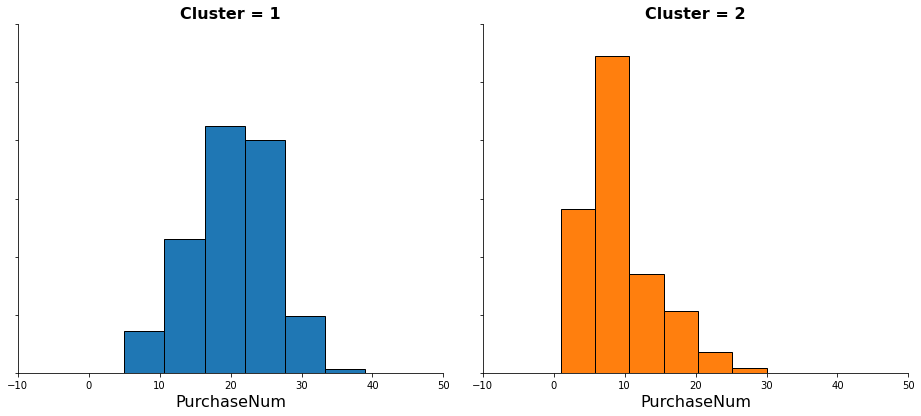

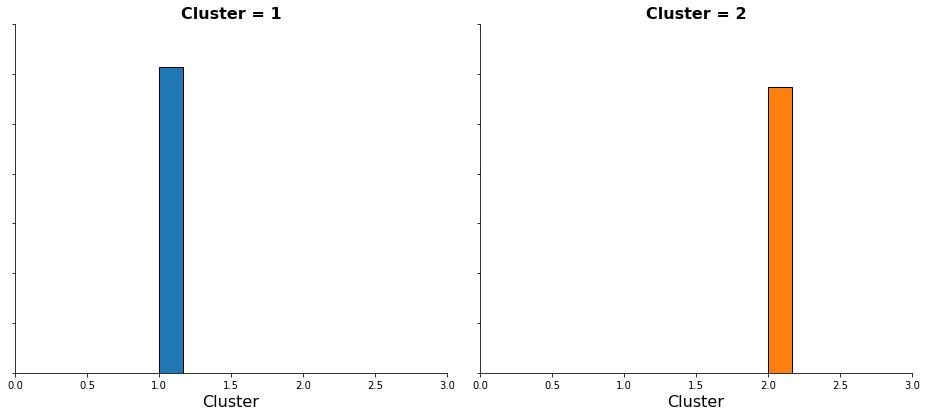

In [55]:
#Clusters interpretation

#Cluster distribution based on each feature
for i in df1:
    diag=sns.FacetGrid(df1, col='Cluster', hue='Cluster')
    diag.map(plt.hist, i, bins = 6, ec='k')
    diag.set_xticklabels()
    diag.set_yticklabels()
    diag.set_xlabels(size=16)
    diag.set_titles(size=16, fontweight='bold')
    diag.fig.set_figheight(7)
    diag.fig.set_figwidth(14)
    
plt.show()

### Observations from the clusters' distribution
##### Highly active customers - these group belongs to cluster 1
##### Least active customers - these group belongs to cluster 2

Cluster characteristics
1. Education
    Cluster 1 - these customers are from PG background
2. Marital status
    People in relationship are twice the single people 
3. Income
    People in cluster 1 earn more than cluster 2
4. Complain
    People in cluster 1 complain more than people in cluster 2
5. Response
    People in cluster 1 have a higher response rate than people in cluster 2
6. Money Spent
    People in cluster 1 have less total spending than people in cluster 2
7. Age
    People in cluster 1 are younger compared to people in cluster 2
8. Total Kids
    People in cluster 1 have less kids compared to poeple in cluster 2
9. Number of purchases
    The total purchases for cluster 1 are more evenly laid out compared to people in cluster 2

In [56]:
PLOT = go.Figure()
for C in list(df1.Cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df1[df1.Cluster == C]["Income"], 
                                y = df1[df1.Cluster == C]["Age"], 
                               z = df1[df1.Cluster == C]["days_engaged"], 
                               mode = 'markers', marker_size = 6, marker_line_width = 1,
                               name = str(C)))
    
PLOT.update_traces(hovertemplate = "Income: %{x} <br>Age: %{y} <br>Days Engaged: %{z}")

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True, 
                   scene = dict(xaxis = dict(title = "Income", titlefont_color = "black"), 
                               yaxis = dict(title = "Age", titlefont_color = "black"), 
                               zaxis = dict(title = "Days Engaged", titlefont_color = "black")), 
                   font = dict(family = "Gilroy", color = "black", size = 12))

### Model Evaluation
K means

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confuxion matrix \n", confusion_matrix(kmeans.labels_, pred))
print("Classification report \n", classification_report(kmeans.labels_, pred))

Confuxion matrix 
 [[615   0]
 [  0 574]]
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       574

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189



### Association Rule Mining: Apriori algorithm
- It uses frequent items in sets to generate association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset. It represents the association between different objects in a set, and finding different patterns in a transaction database.
- Apriori algorithm is the simplest technique to identify the relationships between different types of elements. Here it is used to find out which customers are best suited for a given item, helping businesses to promote the right target customers to increase efficiency and save costs.

In [58]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Importing required libraries for association rules
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Data Preparation for Apriori algorithm

In [60]:
data = df1.copy()
data.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Education  Marital_Status    Income  Complain  Response  days_engaged  \
2          0               1 71613.000         0         0          -591   
3          0               1 26646.000         0         0          -998   
4          0               1 58293.000         0         0          -742   
5          0               1 62513.000         0         0          -610   
7          0               1 33454.000         0         0          -575   

   MoneySpent  Age  TotalKids  PurchaseNum  Cluster  
2         776   57          0           21        1  
3          53   38          1            8        2  
4         422   41          1           19        1  
5         716   55          1           22        1  
7         169   37          1           10        2

In [61]:
#Creating age segments
cut_labels_age = ["Young", "Adult", "Mid-Age", "Senior"]
cut_bins = [0, 18, 40, 60, 120]
data["Age_group"] = pd.cut(data["Age"], bins = cut_bins, labels=cut_labels_age) 

#Creating income segments
cut_labels_income = ["Low Income", "Low-Medium Income", "Medium-High Income", "High Income"]
data["Income_group"] = pd.qcut(data["Income"], q=4, labels=cut_labels_income)

#Creating customer engagement time segments
cut_labels_days_engaged = ["New Customer", "Discovering Customer", "Moderately Old Cusomter", "Old Customer"]
data["days_engaged_group"] = pd.qcut(data["days_engaged"], q=4, labels=cut_labels_days_engaged)

#Dropping the original columns 
data = data.drop(columns=["Age", "Income", "days_engaged"])

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
data["days_engaged_group"].value_counts()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



New Customer               298
Moderately Old Cusomter    298
Discovering Customer       297
Old Customer               296
Name: days_engaged_group, dtype: int64

In [63]:
cut_labels = ["Least Active Customer", "Highly Active Customer"]

#Segmenting customers by Wine
data["Wine_segment"] = pd.qcut(products_df["Wines"][products_df["Wines"] > 0], 
                               q = [0, 0.5, 1], labels = cut_labels)

#Segmenting customers by Fruits
data["Fruits_segment"] = pd.qcut(products_df["Fruits"][products_df["Fruits"] > 0], 
                                q = [0, 0.5, 1], labels = cut_labels)

#Segmenting customers by Meat
data["Meat_segment"] = pd.qcut(products_df["Meat"][products_df["Meat"] > 0], 
                              q = [0, 0.5, 1], labels = cut_labels)

#Segmenting customers by Fish 
data["Fish_segment"] = pd.qcut(products_df["Fish"][products_df["Fish"] > 0], 
                              q = [0, 0.5, 1], labels=cut_labels)

#Segmenting customers by Sweet
data["Sweets_segment"] = pd.qcut(products_df["Sweets"][products_df["Sweets"]>0], 
                                q=[0,0.5,1], labels=cut_labels)

#Segmenting customers by Gold
data["Gold_segment"] = pd.qcut(products_df["Gold"][products_df["Gold"]>0], 
                              q=[0,0.5,1], labels=cut_labels)

data.replace(np.nan, "Inactive customer", inplace = True)
data = data.astype(object)

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
data.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Education Marital_Status Complain Response MoneySpent TotalKids PurchaseNum  \
2         0              1        0        0        776         0          21   
3         0              1        0        0         53         1           8   
4         0              1        0        0        422         1          19   
5         0              1        0        0        716         1          22   
7         0              1        0        0        169         1          10   

  Cluster Age_group        Income_group    days_engaged_group  \
2       1   Mid-Age         High Income  Discovering Customer   
3       2     Adult          Low Income          New Customer   
4       1   Mid-Age  Medium-High Income  Discovering Customer   
5       1   Mid-Age  Medium-High Income  Discovering Customer   
7       2     Adult          Low Income  Discovering Customer   

             Wine_segment          Fruits_segment            Meat_segment  \
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4   Least Active Customer  Highly Active Customer  Highly Active Customer   
5  Highly Active Customer  Highly Active Customer  Highly Active Customer   
7   Least Active Customer   Least Active Customer   Least Active Customer   

             Fish_segment          Sweets_segment            Gold_segment  
2  Highly Active Customer  Highly Active Customer  Highly Active Customer  
3   Least Active Customer   Least Active Customer   Least Active Customer  
4  Highly Active Customer  Highly Active Customer   Least Active Customer  
5                     NaN  Highly Active Customer   Least Active Customer  
7   Least Active Customer   Least Active Customer   Least Active Customer

#### Applying Apriori algorithm

In [65]:
association = data.copy()
association.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Education Marital_Status Complain Response MoneySpent TotalKids PurchaseNum  \
2         0              1        0        0        776         0          21   
3         0              1        0        0         53         1           8   
4         0              1        0        0        422         1          19   
5         0              1        0        0        716         1          22   
7         0              1        0        0        169         1          10   

  Cluster Age_group        Income_group    days_engaged_group  \
2       1   Mid-Age         High Income  Discovering Customer   
3       2     Adult          Low Income          New Customer   
4       1   Mid-Age  Medium-High Income  Discovering Customer   
5       1   Mid-Age  Medium-High Income  Discovering Customer   
7       2     Adult          Low Income  Discovering Customer   

             Wine_segment          Fruits_segment            Meat_segment  \
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4   Least Active Customer  Highly Active Customer  Highly Active Customer   
5  Highly Active Customer  Highly Active Customer  Highly Active Customer   
7   Least Active Customer   Least Active Customer   Least Active Customer   

             Fish_segment          Sweets_segment            Gold_segment  
2  Highly Active Customer  Highly Active Customer  Highly Active Customer  
3   Least Active Customer   Least Active Customer   Least Active Customer  
4  Highly Active Customer  Highly Active Customer   Least Active Customer  
5                     NaN  Highly Active Customer   Least Active Customer  
7   Least Active Customer   Least Active Customer   Least Active Customer

In [66]:
association.drop(columns=["Education", "Marital_Status", "Complain", "Response", "MoneySpent", "TotalKids", "PurchaseNum", "Cluster"], axis = 1, inplace = True)
association.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Age_group        Income_group    days_engaged_group            Wine_segment  \
2   Mid-Age         High Income  Discovering Customer  Highly Active Customer   
3     Adult          Low Income          New Customer   Least Active Customer   
4   Mid-Age  Medium-High Income  Discovering Customer   Least Active Customer   
5   Mid-Age  Medium-High Income  Discovering Customer  Highly Active Customer   
7     Adult          Low Income  Discovering Customer   Least Active Customer   

           Fruits_segment            Meat_segment            Fish_segment  \
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4  Highly Active Customer  Highly Active Customer  Highly Active Customer   
5  Highly Active Customer  Highly Active Customer                     NaN   
7   Least Active Customer   Least Active Customer   Least Active Customer   

           Sweets_segment            Gold_segment  
2  Highly Active Customer  Highly Active Customer  
3   Least Active Customer   Least Active Customer  
4  Highly Active Customer   Least Active Customer  
5  Highly Active Customer   Least Active Customer  
7   Least Active Customer   Least Active Customer

#### Setting the Association Rules

In [67]:
df_ap = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len+1)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents                           consequents  \
0  (Wine_segment_Least Active Customer)                     (Age_group_Adult)   
1                     (Age_group_Adult)  (Wine_segment_Least Active Customer)   
2  (Meat_segment_Least Active Customer)                     (Age_group_Adult)   
3                     (Age_group_Adult)  (Meat_segment_Least Active Customer)   
4                   (Age_group_Mid-Age)             (Income_group_Low Income)   

   antecedent support  consequent support  support  confidence  lift  \
0               0.498               0.143    0.094       0.189 1.323   
1               0.143               0.498    0.094       0.659 1.323   
2               0.509               0.143    0.084       0.165 1.156   
3               0.143               0.509    0.084       0.588 1.156   
4               0.560               0.251    0.140       0.251 1.000   

   leverage  conviction  
0     0.023       1.057  
1     0.023       1.472  
2     0.011       1.027  
3     0.011       1.193  
4     0.000       1.000

#### Finding the "Highly Active Customer" when it comes to "Wine"

In [68]:
product = "Wines"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product, segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending = False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

#### Finding "Highly Active Customer" for "Fruits"

In [69]:
product = "Fruits"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product, segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending = False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
8142  (Income_group_High Income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Age_group_Mid-Age, Meat_segment_Highly Active Customer)   
4713                                       (Gold_segment_Highly Active Customer, Income_group_High Income, Fish_segment_Highly Active Customer, Age_group_Mid-Age)   
1709                                                                            (Gold_segment_Highly Active Customer, Age_group_Mid-Age, Income_group_High Income)   
4658                                       (Gold_segment_Highly Active Customer, Income_group_High Income, Meat_segment_Highly Active Customer, Age_group_Mid-Age)   
7843  (Income_group_High Income, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Age_group_Mid-Age, Meat_segment_Highly Active Customer)   

                                  consequents  antecedent support  \
8142  (Fruits_segment_Highly Active Customer)               0.086   
4713  (Fruits_segment_Highly Active Customer)               0.086   
1709  (Fruits_segment_Highly Active Customer)               0.095   
4658  (Fruits_segment_Highly Active Customer)               0.095   
7843  (Fruits_segment_Highly Active Customer)               0.090   

      consequent support  support  confidence  lift  leverage  conviction  
8142               0.383    0.081       0.941 2.459     0.048      10.495  
4713               0.383    0.081       0.941 2.459     0.048      10.495  
1709               0.383    0.089       0.938 2.451     0.053       9.965  
4658               0.383    0.089       0.938 2.451     0.053       9.965  
7843               0.383    0.084       0.935 2.442     0.050       9.436

#### Finding "Highly Active Customer" for "Meats"

In [70]:
product = "Meat"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product, segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending=False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
10354  (Income_group_High Income, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
7300                                                                        (days_engaged_group_Old Customer, Wine_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
6670                                                                             (Fruits_segment_Highly Active Customer, Income_group_High Income, Gold_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
6640                                                                               (Fruits_segment_Highly Active Customer, Income_group_High Income, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer)   
6550                                                                               (Gold_segment_Highly Active Customer, Income_group_High Income, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   

                                 consequents  antecedent support  \
10354  (Meat_segment_Highly Active Customer)               0.140   
7300   (Meat_segment_Highly Active Customer)               0.083   
6670   (Meat_segment_Highly Active Customer)               0.154   
6640   (Meat_segment_Highly Active Customer)               0.159   
6550   (Meat_segment_Highly Active Customer)               0.160   

       consequent support  support  confidence  lift  leverage  conviction  
10354               0.491    0.140       1.000 2.036     0.071         inf  
7300                0.491    0.083       1.000 2.036     0.042         inf  
6670                0.491    0.154       1.000 2.036     0.078         inf  
6640                0.491    0.159       1.000 2.036     0.081         inf  
6550                0.491    0.160       1.000 2.036     0.081         inf

#### Finding the "Highly Active Customer" for "Fish"

In [71]:
product = "Fish"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product, segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending=False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
10359  (Income_group_High Income, Fruits_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
9302                                        (Income_group_High Income, Fruits_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
9364                                          (Income_group_High Income, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
6583                                                                               (Gold_segment_Highly Active Customer, Income_group_High Income, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
10109         (Fruits_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Age_group_Mid-Age, Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   

                                 consequents  antecedent support  \
10359  (Fish_segment_Highly Active Customer)               0.148   
9302   (Fish_segment_Highly Active Customer)               0.148   
9364   (Fish_segment_Highly Active Customer)               0.160   
6583   (Fish_segment_Highly Active Customer)               0.160   
10109  (Fish_segment_Highly Active Customer)               0.107   

       consequent support  support  confidence  lift  leverage  conviction  
10359               0.404    0.140       0.943 2.336     0.080      10.495  
9302                0.404    0.140       0.943 2.336     0.080      10.495  
9364                0.404    0.151       0.942 2.334     0.086      10.300  
6583                0.404    0.151       0.942 2.334     0.086      10.300  
10109               0.404    0.100       0.937 2.321     0.057       9.466

#### Finding the "Highly Active Customer" for "Sweets"

In [72]:
product = "Sweets"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product,segment)
results_personnel_care = rules[rules["consequents"].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending = False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
4741                           (Income_group_High Income, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Age_group_Mid-Age)   
1757                                                                (Age_group_Mid-Age, Fish_segment_Highly Active Customer, Income_group_High Income)   
6731         (Gold_segment_Highly Active Customer, Income_group_High Income, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
3090                                              (Gold_segment_Highly Active Customer, Income_group_High Income, Fish_segment_Highly Active Customer)   
7301  (days_engaged_group_Old Customer, Wine_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   

                                  consequents  antecedent support  \
4741  (Sweets_segment_Highly Active Customer)               0.113   
1757  (Sweets_segment_Highly Active Customer)               0.113   
6731  (Sweets_segment_Highly Active Customer)               0.171   
3090  (Sweets_segment_Highly Active Customer)               0.171   
7301  (Sweets_segment_Highly Active Customer)               0.093   

      consequent support  support  confidence  lift  leverage  conviction  
4741               0.392    0.102       0.903 2.304     0.058       6.268  
1757               0.392    0.102       0.903 2.304     0.058       6.268  
6731               0.392    0.154       0.901 2.300     0.087       6.172  
3090               0.392    0.154       0.901 2.300     0.087       6.172  
7301               0.392    0.083       0.900 2.296     0.047       6.081

#### Finding the "Highly Active Customer" for "Gold"

In [73]:
product = "Gold"
segment = "Highly Active Customer"
target = '{\'%s_segment_%s\'}'%(product,segment)
results_personnel_care = rules[rules["consequents"].astype(str).str.contains(target, na=False)].sort_values(by="confidence", ascending = False)
results_personnel_care.head()

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
9859  (Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
7452                                       (Fruits_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)   
7392                                         (Fruits_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer)   
3987                                                                              (Fruits_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Fish_segment_Highly Active Customer)   
8442                      (Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wine_segment_Highly Active Customer, Age_group_Mid-Age, Meat_segment_Highly Active Customer)   

                                consequents  antecedent support  \
9859  (Gold_segment_Highly Active Customer)               0.232   
7452  (Gold_segment_Highly Active Customer)               0.233   
7392  (Gold_segment_Highly Active Customer)               0.263   
3987  (Gold_segment_Highly Active Customer)               0.266   
8442  (Gold_segment_Highly Active Customer)               0.135   

      consequent support  support  confidence  lift  leverage  conviction  
9859               0.457    0.198       0.851 1.864     0.092       3.657  
7452               0.457    0.198       0.848 1.858     0.091       3.583  
7392               0.457    0.223       0.847 1.854     0.103       3.543  
3987               0.457    0.224       0.842 1.843     0.102       3.434  
8442               0.457    0.114       0.839 1.836     0.052       3.364

### Objectives of Association Rule Mining:

- We can hereby predict and determine the biggest customers for a particular product and multiple ways of market their focus can be narrowed down to these specific customers and their needs.
- Apriori algorithm helps the businesses to plan appropriate Product Pricings, making better decision on product positioning, and helping the business owners to work on product assortment, and availability of different category of products, all based on the needs of these Highly Active Customers.

## Classification - Logistic Regression

 - To determine whether customers will purchase the company's products or not?

In [74]:
#Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:
#Making a copy of the dataset and splitting them into two different elements
df2 = df1.copy()
x = df2.drop('Cluster', axis=1)
y=df2["Cluster"]

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
#Performing the train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
#Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression()

In [79]:
y_predicted = log_reg.predict(x_test)

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Model Evaluation

In [80]:
#Importing the libraries for metrics generation

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/Users/chintanvaghela/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Classificaiton Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.96       112
           2       0.98      0.95      0.97       126

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

------------------------------------------------------------
Accuracy Score:  0.9663865546218487
------------------------------------------------------------

F1 Score:  0.9649122807017544
------------------------------------------------------------

Confusion Matrix: 
 [[110   2]
 [  6 120]]


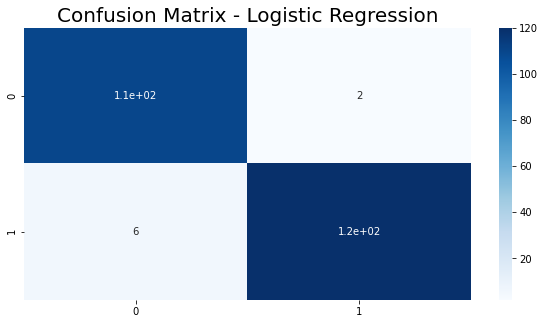

In [82]:
#Performance of the model
print("Classificaiton Report: \n", classification_report(y_test, y_predicted))
print("-"*60)

#Accuracy Score
acc = accuracy_score(y_test, y_predicted)

print("Accuracy Score: ", acc)
print("-"*60)
print()

#F1 score
f1 = f1_score(y_test, y_predicted)

print("F1 Score: ", f1)
print("-"*60)
print()

#Confusion Matrix
print("Confusion Matrix: \n",  confusion_matrix(y_test, y_predicted))
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot= True, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression", fontsize = 20)
plt.show()

It can be observed that the Logistic Regression predicted only 8 incorrect values, with an accuracy score of 96.63%